In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.conftest import axis_1
from polars.selectors import alpha

In [2]:
df = pd.read_csv("../../DATA/mouse_viral_study.csv")

In [3]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

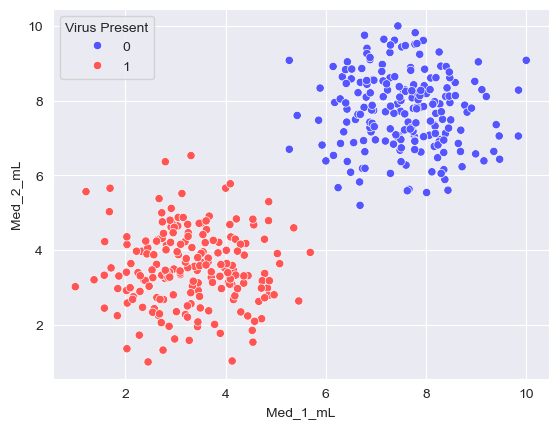

In [4]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df,palette='seismic')

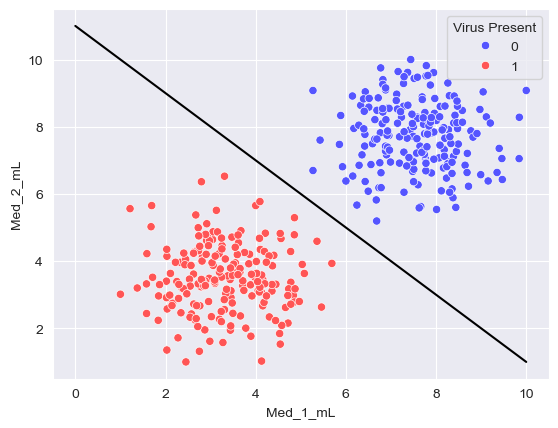

In [5]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)

# We want to somehow automatically create a separating hyperplane ( a line in 2D)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

In [6]:
from sklearn.svm import SVC

In [7]:
X = df.drop('Virus Present', axis=1)

In [11]:
y = df['Virus Present']

In [12]:
from sklearn.inspection import DecisionBoundaryDisplay

In [29]:
svc = SVC(kernel='linear', C=1000)

In [30]:
svc.fit(X, y)

SVC(C=1000, kernel='linear')

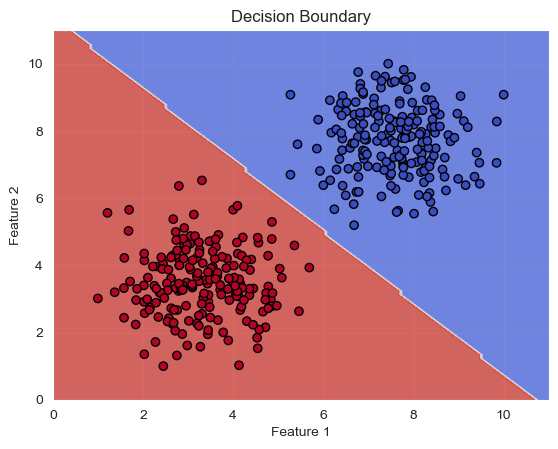

In [31]:
disp = DecisionBoundaryDisplay.from_estimator(svc, X, response_method='predict', cmap='coolwarm', alpha=0.8)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

In [32]:
def decision_boundary_display(model, x):
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        x,
        response_method='predict',
        cmap='coolwarm',
        alpha=.8
    )
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

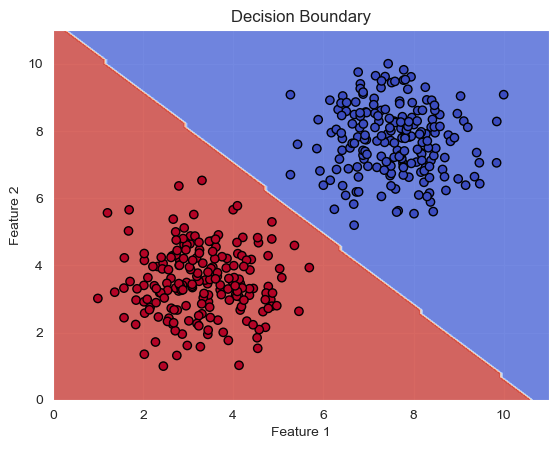

In [28]:
decision_boundary_display(model=svc, x=X)

In [33]:
svc_linear = SVC(kernel='linear', C=0.5)

In [35]:
svc_linear.fit(X, y)

SVC(C=0.5, kernel='linear')

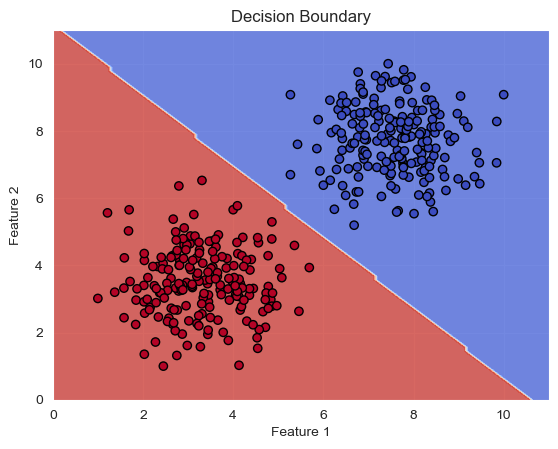

In [36]:
decision_boundary_display(svc_linear, X)

In [40]:
model_rbf = SVC(kernel='rbf', C=1)
model_rbf.fit(X, y)

SVC(C=1)

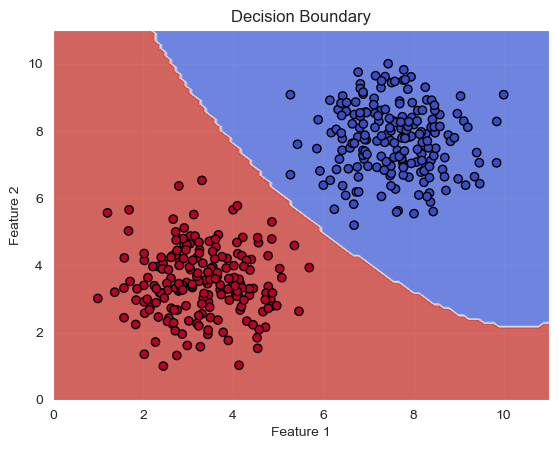

In [41]:
decision_boundary_display(model_rbf, X)

In [44]:
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(X, y)

SVC(kernel='sigmoid')

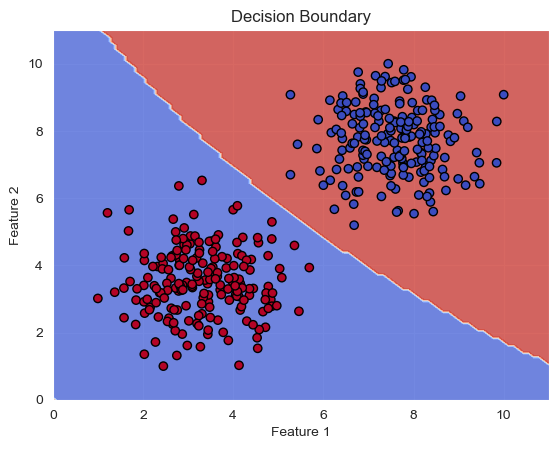

In [45]:
decision_boundary_display(model_sigmoid, X)

In [48]:
model_poly = SVC(kernel='poly', C=1, degree=1)
model_poly.fit(X, y)

SVC(C=1, degree=1, kernel='poly')

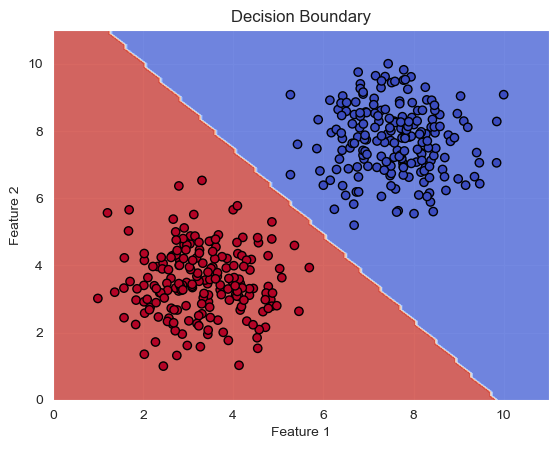

In [49]:
decision_boundary_display(model_poly, X)

In [50]:
model = SVC(kernel='rbf', C=1,gamma=0.01)
model.fit(X, y)

SVC(C=1, gamma=0.01)

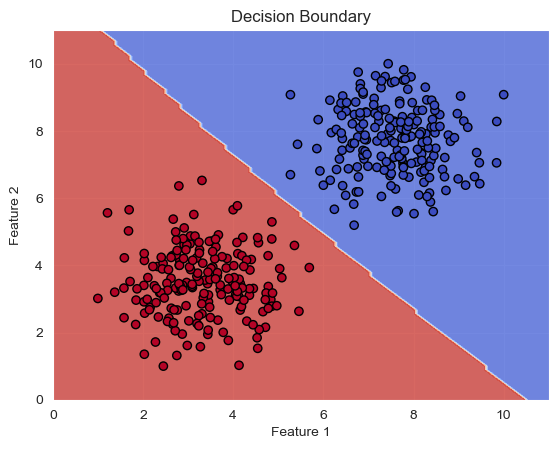

In [51]:
decision_boundary_display(model, X)

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [54]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [55]:
grid.best_score_

1.0

In [56]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}